In [12]:
!pip install factor_analyzer

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [31]:

# Load Wine dataset
wine = load_wine(as_frame=True)
data = wine.data 
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Apply Bartlett's test

In [32]:
# Apply Bartlett's test
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Chi-Square value: {chi_square_value:.3f}, p-value: {p_value:.3f}")

Chi-Square value: 1317.181, p-value: 0.000


## Interpretation
Here, Bartlett’s test p-value <0.05 that indicates it's suitable for factor analysis.

# Apply KMO test

In [33]:
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Model: {kmo_model:.3f}")

KMO Model: 0.779


## Interpretation
Here KMO of 0.779 indicates adequate sampling adequacy, meaning this data is suitable for factor analysis.

# Create FactorAnalyzer object and fit

In [35]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(data)

C:\Users\Raka\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

# Check Eigenvalues

In [36]:
eigen_values, vectors = fa.get_eigenvalues()

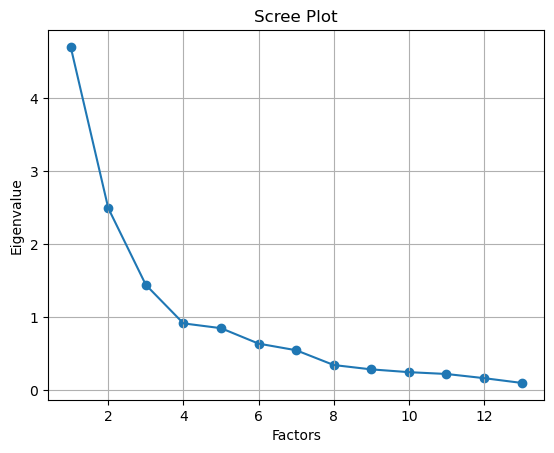

In [37]:
plt.scatter(range(1, data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Interpretation
The scree plot shows a steep decline in eigenvalues for the first two factors, followed by a more gradual drop, indicating that most of the variance is explained by the first few factors. The “elbow” appears around the third factor, after which the eigenvalues level off below 1, suggesting diminishing returns in explanatory power. According to the Kaiser criterion (eigenvalues > 1) and the elbow method, retaining the first three factors would be appropriate, as they capture the most meaningful structure in the data while avoiding the inclusion of noise from less significant factors.

In [38]:
# Perform factor analysis with chosen number of factors
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(data)

C:\Users\Raka\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [39]:
# Factor loadings
loadings = pd.DataFrame(fa.loadings_, index=data.columns, columns=["Factor1", "Factor2", "Factor3"])
print("\nFactor Loadings:\n", loadings)


Factor Loadings:
                                Factor1   Factor2   Factor3
alcohol                       0.035312  0.797974 -0.065666
malic_acid                   -0.494937  0.093006  0.227728
ash                           0.025898  0.312247  0.726860
alcalinity_of_ash            -0.300980 -0.305777  0.752131
magnesium                     0.167642  0.396137  0.120802
total_phenols                 0.798142  0.336009  0.034061
flavanoids                    0.920812  0.262887  0.016319
nonflavanoid_phenols         -0.519761 -0.170054  0.244057
proanthocyanins               0.591530  0.221014  0.019025
color_intensity              -0.427445  0.711506  0.113094
hue                           0.678037 -0.175684 -0.144426
od280/od315_of_diluted_wines  0.862281 -0.011199 -0.032300
proline                       0.375555  0.727213 -0.099472


## Interpretation
The factor analysis of the wine dataset revealed three latent dimensions. The first, Phenolic Compounds Factor, is driven by strong loadings on flavanoids (0.921), OD280/OD315 (0.862), total phenols (0.798), proanthocyanins (0.592), and hue (0.678), representing the wine’s polyphenol and flavonoid content that affect bitterness, taste, and aging potential. The second, Alcohol & Color Intensity Factor, shows high loadings on alcohol (0.798), proline (0.728), and color intensity (0.712), capturing attributes linked to alcoholic strength, color richness, and related compounds. The third, Acidity & Minerals Factor, is characterized by high loadings on alcalinity of ash (0.752) and ash (0.727), along with a moderate loading on malic acid (0.228), reflecting acidity and mineral composition that influence freshness and tartness.

In [40]:
# Variance explained by each factor
variance = fa.get_factor_variance()
variance_df = pd.DataFrame({
    "SS Loadings": variance[0],
    "Proportion Var": variance[1],
    "Cumulative Var": variance[2]
}, index=["Factor1", "Factor2", "Factor3"])
print("\nVariance Explained:\n", variance_df)


Variance Explained:
          SS Loadings  Proportion Var  Cumulative Var
Factor1     3.997571        0.307505        0.307505
Factor2     2.319182        0.178399        0.485904
Factor3     1.270732        0.097749        0.583653
